In [1]:
!git clone https://github.com/MKasaei00/graph-edge-anomaly-detection.git

Cloning into 'graph-edge-anomaly-detection'...
remote: Enumerating objects: 243, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 243 (delta 1), reused 1 (delta 1), pack-reused 235 (from 1)
Receiving objects: 100% (243/243), 41.03 MiB | 9.63 MiB/s, done.
Resolving deltas: 100% (118/118), done.
Updating files: 100% (51/51), done.


In [2]:
!sudo apt-get install unrar  # Install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [3]:
!pwd

/content


In [4]:
!ls /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar -ltrh

-rw-r--r-- 1 root root 3.5M Mar  4 19:07 /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar


In [5]:
# Extract the .rar file
!unrar x /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar /content/graph-edge-anomaly-detection/datasets/DARPA/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/graph-edge-anomaly-detection/datasets/DARPA/meta.rar

Creating    /content/graph-edge-anomaly-detection/datasets/DARPA/meta  OK
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/max values.txt      36%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/min values.txt      36%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/q1 values.txt      36%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/q2 values.txt      36%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/q3 values.txt      44%  OK 
Extracting  /content/graph-edge-anomaly-detection/datasets/DARPA/meta/sum values backup.txt      99%  OK 
All OK


In [6]:
import pandas as pd
import os

# Define the directory containing the .txt files
directory = '/content/graph-edge-anomaly-detection/datasets/DARPA/meta/'

# Initialize a dictionary to store the DataFrames
dataframes = {}

# Loop through all files in the directoryn
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        # Construct the full file path
        file_path = os.path.join(directory, filename)
        # Read the file into a DataFrame
        df = pd.read_csv(file_path, delimiter='\t', header=None)  # Adjust delimiter if needed
        # Store the DataFrame in the dictionary
        dataframes[filename.replace('.txt', '')] = df

# Display the keys (file names) in the dictionary
print("Loaded DataFrames:", list(dataframes.keys()))

Loaded DataFrames: ['min values', 'q1 values', 'q3 values', 'sum values backup', 'max values', 'q2 values']


In [7]:
dataframes['min values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
4554339,0
4554340,0
4554341,0
4554342,0


In [8]:
dataframes['q1 values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
4554339,0
4554340,0
4554341,0
4554342,0


In [9]:
dataframes['q2 values']

,0
0,0
1,0
2,0
3,0
4,0
...,...
4554339,0
4554340,0
4554341,0
4554342,0


In [10]:
dataframes['q3 values']

,0
0,0.000000e+00
1,0.000000e+00
2,0.000000e+00
3,0.000000e+00
4,0.000000e+00
...,...
4554339,3.719280e-43
4554340,3.719280e-43
4554341,3.719280e-43
4554342,3.719280e-43


In [11]:
dataframes['max values']

,0
0,1.000
1,2.000
2,1.800
3,2.000
4,1.800
...,...
4554339,201.174
4554340,201.174
4554341,201.174
4554342,201.174


In [12]:
dataframes['sum values backup']

,0
0,2.000
1,4.000
2,5.600
3,7.600
4,8.840
...,...
4554339,807.989
4554340,809.989
4554341,811.989
4554342,813.989


In [13]:
import pandas as pd

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(dataframes.values(), axis=1)

# Set the column names to the original file names (without .txt)
merged_df.columns = dataframes.keys()

# Display the merged DataFrame
print(merged_df.head())

   min values  q1 values  q3 values  sum values backup  max values  q2 values
0           0          0        0.0               2.00         1.0          0
1           0          0        0.0               4.00         2.0          0
2           0          0        0.0               5.60         1.8          0
3           0          0        0.0               7.60         2.0          0
4           0          0        0.0               8.84         1.8          0


In [14]:
merged_df

,min values,q1 values,q3 values,sum values backup,max values,q2 values
0,0,0,0.000000e+00,2.000,1.000,0
1,0,0,0.000000e+00,4.000,2.000,0
2,0,0,0.000000e+00,5.600,1.800,0
3,0,0,0.000000e+00,7.600,2.000,0
4,0,0,0.000000e+00,8.840,1.800,0
...,...,...,...,...,...,...
4554339,0,0,3.719280e-43,807.989,201.174,0
4554340,0,0,3.719280e-43,809.989,201.174,0
4554341,0,0,3.719280e-43,811.989,201.174,0
4554342,0,0,3.719280e-43,813.989,201.174,0


In [15]:
!ls /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip

/content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip


In [16]:
!rm -rf /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score
!unzip /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip -d /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score

Archive:  /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score.zip
  inflating: /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score/anoedge_g_DARPA_score.csv  


In [17]:
!ls /content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score

anoedge_g_DARPA_score.csv


In [18]:
file_path = '/content/graph-edge-anomaly-detection/AnoEdge/results/anoedge_g_DARPA_score/anoedge_g_DARPA_score.csv'
scores_dataframe = pd.read_csv(file_path, sep=' ', header=None);
scores_dataframe.columns = ['Score', 'Label']
scores_dataframe

,Score,Label
0,1.0000,0
1,2.0000,0
2,1.0000,0
3,2.0000,0
4,1.0000,0
...,...,...
4554339,140.1304,0
4554340,140.8375,0
4554341,141.5446,0
4554342,142.2517,0


In [19]:
merged = pd.concat([scores_dataframe,merged_df],axis=1)

In [20]:
merged

,Score,Label,min values,q1 values,q3 values,sum values backup,max values,q2 values
0,1.0000,0,0,0,0.000000e+00,2.000,1.000,0
1,2.0000,0,0,0,0.000000e+00,4.000,2.000,0
2,1.0000,0,0,0,0.000000e+00,5.600,1.800,0
3,2.0000,0,0,0,0.000000e+00,7.600,2.000,0
4,1.0000,0,0,0,0.000000e+00,8.840,1.800,0
...,...,...,...,...,...,...,...,...
4554339,140.1304,0,0,0,3.719280e-43,807.989,201.174,0
4554340,140.8375,0,0,0,3.719280e-43,809.989,201.174,0
4554341,141.5446,0,0,0,3.719280e-43,811.989,201.174,0
4554342,142.2517,0,0,0,3.719280e-43,813.989,201.174,0


In [21]:
# prompt: rename and reorder merged data frame to name : darpa summary
# score : first column
# label : second
# after that order like this
# min q1 median q3 max
# sum is the last column and rename it to sum

# Rename columns
merged = merged.rename(columns={
    'min values': 'min',
    'q1 values': 'q1',
    'q2 values': 'median',
    'q3 values': 'q3',
    'max values': 'max',
    'sum values backup': 'sum'
})

# Reorder columns
new_order = ['Score', 'Label', 'min', 'q1', 'median', 'q3', 'max', 'sum']
merged = merged[new_order]

# Rename the DataFrame
merged_df = merged
merged_df = merged_df.rename(index=str, columns={"Score": "score", "Label": "label"})

# Display the updated DataFrame
print(merged_df.head())
merged_df


   score  label  min  q1  median   q3  max   sum
0    1.0      0    0   0       0  0.0  1.0  2.00
1    2.0      0    0   0       0  0.0  2.0  4.00
2    1.0      0    0   0       0  0.0  1.8  5.60
3    2.0      0    0   0       0  0.0  2.0  7.60
4    1.0      0    0   0       0  0.0  1.8  8.84


,score,label,min,q1,median,q3,max,sum
0,1.0000,0,0,0,0,0.000000e+00,1.000,2.000
1,2.0000,0,0,0,0,0.000000e+00,2.000,4.000
2,1.0000,0,0,0,0,0.000000e+00,1.800,5.600
3,2.0000,0,0,0,0,0.000000e+00,2.000,7.600
4,1.0000,0,0,0,0,0.000000e+00,1.800,8.840
...,...,...,...,...,...,...,...,...
4554339,140.1304,0,0,0,0,3.719280e-43,201.174,807.989
4554340,140.8375,0,0,0,0,3.719280e-43,201.174,809.989
4554341,141.5446,0,0,0,0,3.719280e-43,201.174,811.989
4554342,142.2517,0,0,0,0,3.719280e-43,201.174,813.989


In [22]:
merged_df.dtypes

,0
score,float64
label,int64
min,int64
q1,int64
median,int64
q3,float64
max,float64
sum,float64


In [24]:
# prompt: Convert all the values except the score to int64

# Convert columns to int64, excluding 'score' and 'label'
for col in merged_df.columns:
    if col not in ['score', 'label']:
        merged_df[col] = merged_df[col].astype('int64')

# Display data types to verify
merged_df.dtypes


,0
score,float64
label,int64
min,int64
q1,int64
median,int64
q3,int64
max,int64
sum,int64


In [25]:
merged_df

,score,label,min,q1,median,q3,max,sum
0,1.0000,0,0,0,0,0,1,2
1,2.0000,0,0,0,0,0,2,4
2,1.0000,0,0,0,0,0,1,5
3,2.0000,0,0,0,0,0,2,7
4,1.0000,0,0,0,0,0,1,8
...,...,...,...,...,...,...,...,...
4554339,140.1304,0,0,0,0,0,201,807
4554340,140.8375,0,0,0,0,0,201,809
4554341,141.5446,0,0,0,0,0,201,811
4554342,142.2517,0,0,0,0,0,201,813


from matplotlib import pyplot as plt
merged_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='score', y='label', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='label', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='max', y='sum', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['label']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('label')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['sum']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_df.sort_values('min', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('sum')

from matplotlib import pyplot as plt
merged_df['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_df['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_df['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_df['sum'].plot(kind='line', figsize=(8, 4), title='sum')
plt.gca().spines[['top', 'right']].set_visible(False)

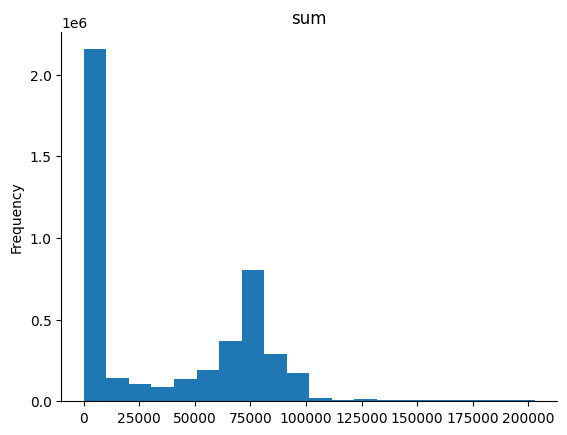

In [26]:
from matplotlib import pyplot as plt
merged_df['sum'].plot(kind='hist', bins=20, title='sum')
plt.gca().spines[['top', 'right',]].set_visible(False)

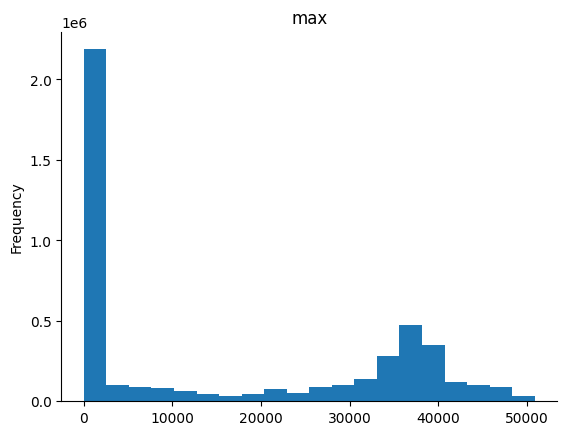

In [27]:
from matplotlib import pyplot as plt
merged_df['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

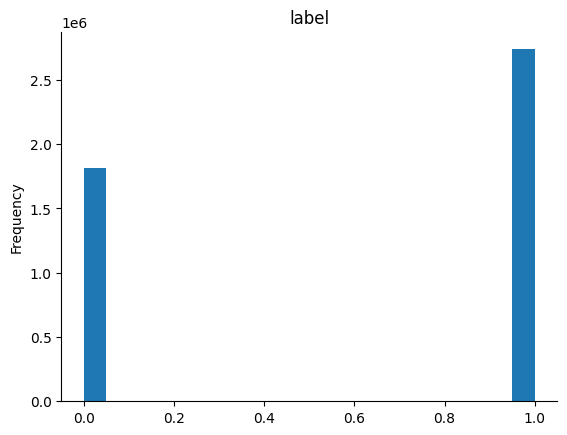

In [28]:
from matplotlib import pyplot as plt
merged_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

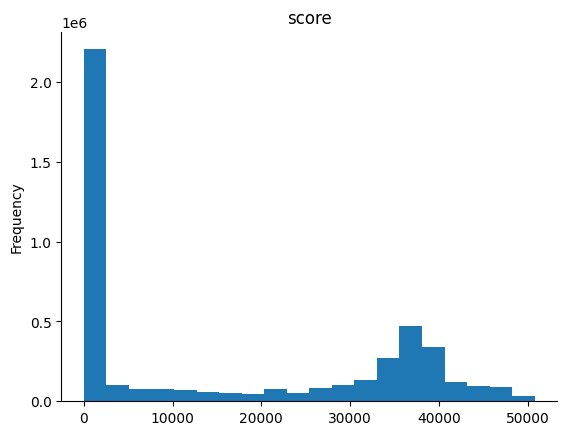

In [29]:
from matplotlib import pyplot as plt
merged_df['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

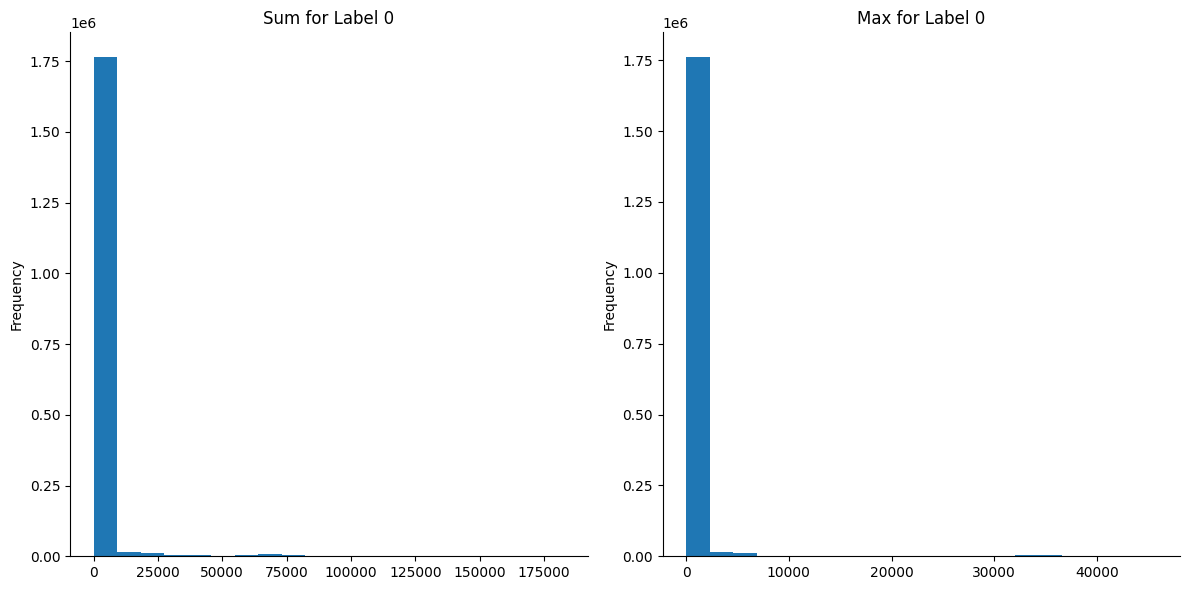

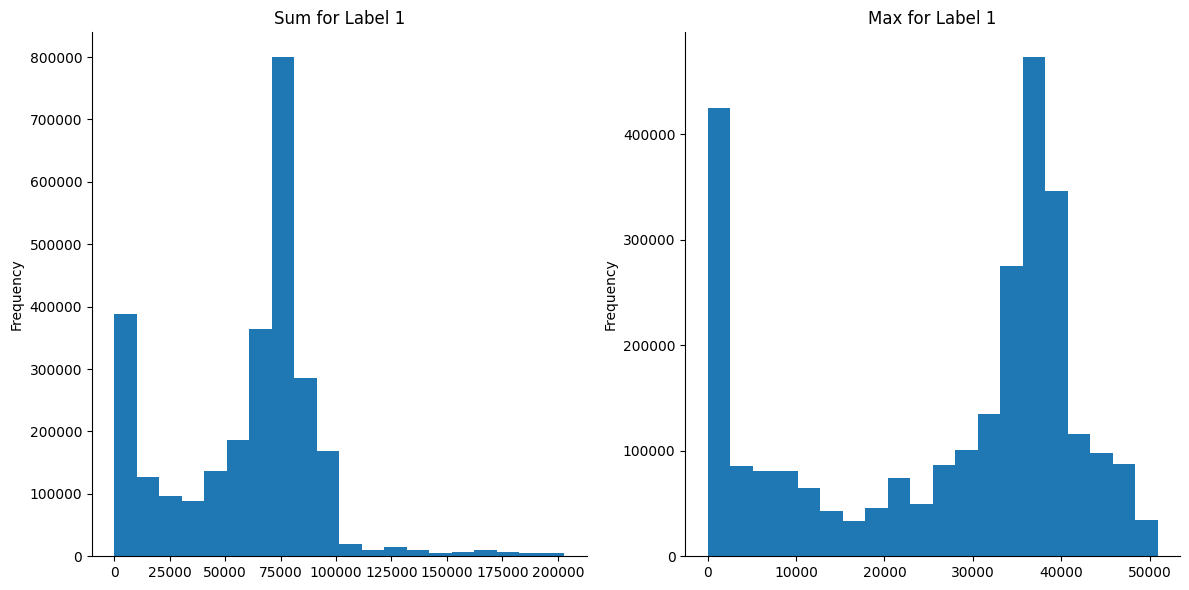

In [30]:
# prompt: draw sum and max plot group by label values
# it means for zero and one labels draw separate diagrams
# in total I need 4 diagrams

import matplotlib.pyplot as plt

# Assuming merged_df is already defined and processed as in the provided code

for label in merged_df['label'].unique():
    subset = merged_df[merged_df['label'] == label]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    subset['sum'].plot(kind='hist', bins=20, title=f'Sum for Label {label}')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.subplot(1, 2, 2)
    subset['max'].plot(kind='hist', bins=20, title=f'Max for Label {label}')
    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()
